In [1]:
# Number of observations: 6366 Number of variables: 9 Variable name definitions:
# rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
#                 4 = good, 5 = very good
# age             : Age
# yrs_married     : No. years married. Interval approximations. See
#                 original paper for detailed explanation.
# children        : No. children
# religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
#                 4 = strongly
# educ            : Level of education, 9 = grade school, 12 = high
#                 school, 14 = some college, 16 = college graduate,
#                 17 = some graduate school, 20 = advanced degree
# occupation      : 1 = student, 2 = farming, agriculture; semi-skilled,
#                 or unskilled worker; 3 = white-colloar; 4 = teacher
#                 counselor social worker, nurse; artist, writers;
#                 technician, skilled worker, 5 = managerial,
#                 administrative, business, 6 = professional with
#                 advanced degree
# occupation_husb : Husband's occupation. Same as occupation.
# affairs         : measure of time spent in extramarital affairs

# See the original paper for more details.

# Data Imports
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

# Math
import math

# Plot imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Machine Learning Imports
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

# For evaluating our ML results
from sklearn import metrics

# Dataset Import
import statsmodels.api as sm

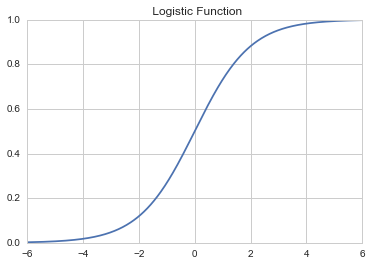

In [2]:
# Logistic Function
def logistic(t):
    return 1.0 / (1 + math.exp((-1.0)*t) )

# Set t from -6 to 6 ( 500 elements, linearly spaced)
t = np.linspace(-6,6,500)

# Set up y values (using list comprehension)
y = np.array([logistic(ele) for ele in t])

# Plot
plt.plot(t,y)
plt.title(' Logistic Function ')

In [3]:
# Standard method of loading Statsmodels datasets into a pandas DataFrame. Note the name fair stands for 'affair' dataset.
df = sm.datasets.fair.load_pandas().data

In [4]:
# Preview
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3,32,9.0,3,3,17,2,5,0.111111
1,3,27,13.0,3,1,14,3,4,3.230769
2,4,22,2.5,0,1,16,3,5,1.400000
3,4,37,16.5,4,3,16,5,5,0.727273
4,5,27,9.0,1,1,14,3,4,4.666666


In [5]:
# Create check function
def affair_check(x):
    if x != 0:
        return 1
    else:
        return 0

# Apply to DataFrame
df['Had_Affair'] = df['affairs'].apply(affair_check)

In [6]:
df

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_Affair
0,3,32.0,9.0,3.0,3,17,2,5,0.111111,1
1,3,27.0,13.0,3.0,1,14,3,4,3.230769,1
2,4,22.0,2.5,0.0,1,16,3,5,1.400000,1
3,4,37.0,16.5,4.0,3,16,5,5,0.727273,1
4,5,27.0,9.0,1.0,1,14,3,4,4.666666,1
5,4,27.0,9.0,0.0,2,14,3,4,4.666666,1
6,5,37.0,23.0,5.5,2,12,5,4,0.852174,1
7,5,37.0,23.0,5.5,2,12,2,3,1.826086,1
8,3,22.0,2.5,0.0,2,12,3,3,4.799999,1
9,3,27.0,6.0,0.0,1,16,3,5,1.333333,1


In [7]:
# Groupby Had Affair column
df.groupby('Had_Affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
Had_Affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


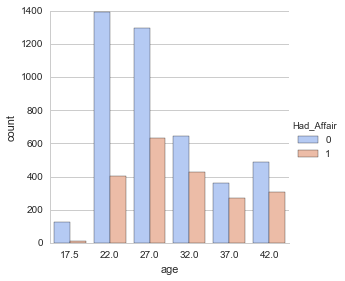

In [18]:
# Factorplot for age with Had Affair hue
from collections import Counter
age_copy =[item for item in df['age']]
key = Counter(age_copy).keys()
#Here,please do not do Counter(age_copy).keys(),
#It may get confused
key.sort()
sns.factorplot('age',data=df,order=key,hue='Had_Affair',hue_order = [0,1],kind="count",palette='coolwarm')

In [ ]:
# This suggests a higher probability of an affair 
#as age increases.
# Let's check the number of years married.
#Yet, the affair age range is focused on [22,37]

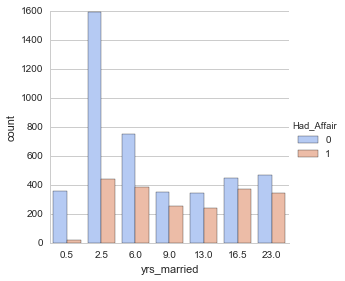

In [20]:
# Factorplot for years married with Had Affair hue
marriage_yrs =[item for item in df['yrs_married']]
key = Counter(marriage_yrs).keys()
key.sort()
sns.factorplot('yrs_married',data=df,order=key,hue='Had_Affair',hue_order = [0,1],kind="count",palette='coolwarm')

In [21]:
# Looks like probability of 
# having an affair explosivelyi increases from .5 to 2.5 yrs
#of marriage

# Let's check the number of children.

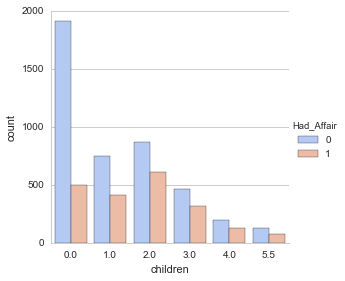

In [22]:
num_children =[item for item in df['children']]
key = Counter(num_children).keys()
key.sort()
sns.factorplot('children',data=df,order=key,hue='Had_Affair',hue_order = [0,1],kind="count",palette='coolwarm')

In [23]:
#more children leads to a higher chance of having an affair

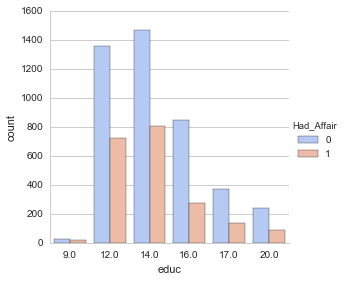

In [24]:
education =[item for item in df['educ']]
key = Counter(education).keys()
key.sort()
sns.factorplot('educ',data=df,order=key,hue='Had_Affair',hue_order = [0,1],kind="count",palette='coolwarm')

In [25]:
#the less educated group does bear a higher chance of having an affair

In [27]:
#Categorical Variables
# Create new DataFrames for the Categorical Variables
occ_dummies = pd.get_dummies(df['occupation'])
hus_occ_dummies = pd.get_dummies(df['occupation_husb'])

occ_dummies.head()

,1.0,2.0,3.0,4.0,5.0,6.0
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


In [28]:
# Create column names for the new DataFrames
occ_dummies.columns = ['occ1','occ2','occ3','occ4','occ5','occ6']
hus_occ_dummies.columns = ['hocc1','hocc2','hocc3','hocc4','hocc5','hocc6']

In [29]:
# Set X as new DataFrame without the occupation columns or the Y target
X = df.drop(['occupation','occupation_husb','Had_Affair'],axis=1)

In [31]:
# Concat the dummy DataFrames Together
dummies = pd.concat([occ_dummies,hus_occ_dummies],axis=1)

In [32]:
# Now Concat the X DataFrame with the dummy variables
X = pd.concat([X,dummies],axis=1)

# Preview of Result
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3,32,9.0,3,3,17,0.111111,0,1,0,0,0,0,0,0,0,0,1,0
1,3,27,13.0,3,1,14,3.230769,0,0,1,0,0,0,0,0,0,1,0,0
2,4,22,2.5,0,1,16,1.400000,0,0,1,0,0,0,0,0,0,0,1,0
3,4,37,16.5,4,3,16,0.727273,0,0,0,0,1,0,0,0,0,0,1,0
4,5,27,9.0,1,1,14,4.666666,0,0,1,0,0,0,0,0,0,1,0,0


In [36]:
# Set Y as Target class, Had Affair
# remember   .Had_Affair === ['Affair']

Y = df.Had_Affair

# Preview
Y.head()
Y.tail()


6361    0
6362    0
6363    0
6364    0
6365    0
Name: Had_Affair, dtype: int64

In [35]:
# Part 6: Multicollinearity Consideration.

In [37]:
# Now we need to get rid of a few columns. 
# We will be dropping the occ1 and hocc1 columns to avoid multicollinearity. 
# Multicollinearity occurs due to the dummy variables) we created. 
# This is because the dummy variables are highly correlated, 
# our model begins to get distorted because one of the dummy variables 
# can be linearly predicted from the others. 
# We take care of this problem by dropping one of the dummy variables 
# from each set, we do this at the cost of losing a data set point.
# The other column we will drop is the affairs column. 
# This is because it is basically a repeat of what will be our Y target,
# instead of 0 and 1 it just has 0 or a number,
# so we'll need to drop it for our target to make sense.

In [38]:
# Dropping one column of each dummy variable set to avoid multicollinearity
X = X.drop('occ1',axis=1)
X = X.drop('hocc1',axis=1)

# Drop affairs column so Y target makes sense
X = X.drop('affairs',axis=1)

# PReview
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occ2,occ3,occ4,occ5,occ6,hocc2,hocc3,hocc4,hocc5,hocc6
0,3,32,9.0,3,3,17,1,0,0,0,0,0,0,0,1,0
1,3,27,13.0,3,1,14,0,1,0,0,0,0,0,1,0,0
2,4,22,2.5,0,1,16,0,1,0,0,0,0,0,0,1,0
3,4,37,16.5,4,3,16,0,0,0,1,0,0,0,0,1,0
4,5,27,9.0,1,1,14,0,1,0,0,0,0,0,1,0,0


In [41]:
#"flatten" the array technique ----ravel()
#  http://docs.scipy.org/doc/numpy/reference/generated/numpy.ravel.html
# In order to use the Y with SciKit Learn, we need to set it as a 1-D array. 
# This means we need to "flatten" the array.
# Numpy has a built in method for this called ravel. Let's use it!

In [42]:
# Flatten array
Y = np.ravel(Y)

# Check result
Y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [43]:
#Part 7: Logistic Regression with SciKit Learn

In [44]:
# I'll create the model, the fit the data into the model, 
#and check our accuracy score. Then I'll split the data into testing 
# and training sets and see if my results improve.

In [45]:
# Create LogisticRegression model
log_model = LogisticRegression()

# Fit our data
log_model.fit(X,Y)

# Check our accuracy
log_model.score(X,Y)

0.72588752748978946

In [46]:
# Looks like we got a 73% accuracy rating. 
# Let's go ahead and compare this to the original Y data. 
# We can do this by simply taking the mean of the Y data, 
# since it is in the format 1 or 0,
# we can use the mean to calulate the percentage 
# of women who reported having affairs. 

In [47]:
# Check percentage of women that had affairs
Y.mean()

0.32249450204209867

In [48]:
# This means that if our model just simply guessed "no affair"
# we would have had 1-0.32=0.68 accuracy (or 68%) accuracy.
# So while we are doing better than the null error rate,
# we aren't doing that much better.

In [56]:
# Use zip to bring the column names 
#and the np.transpose function to bring together the coefficients from the model
#"transpose" is used to allaign our coefficient from rows to columns
coeff_df = DataFrame(zip(X.columns, np.transpose(log_model.coef_)))
#the new seaborn treat assignment as just an assignment without printing
coeff_df

,0,1
0,rate_marriage,[-0.69751024616]
1,age,[-0.0561916647628]
2,yrs_married,[0.10377681236]
3,children,[0.0182911397779]
4,religious,[-0.36832290498]
5,educ,[0.00890195753587]
6,occ2,[0.296111837283]
7,occ3,[0.606052332054]
8,occ4,[0.343259482442]
9,occ5,[0.94006396288]


In [57]:

# Looking at the coefficients we can see that a positive coeffecient
# corresponds to increasing the likelihood of having an affair 
# while a negative coefficient means
# it corresponds to a decreased likelihood of having an affair 
# as the actual data value point increases.


In [59]:
# Since all the dummy variables (the wife and husband occupations) 
# are positive that means the lowest likelihood of
# having an affair corresponds to the baseline occupation we dropped (1-Student).

#Note:This is like one factor anova

# Thus,we have:
# Since all the dummy variables (the wife and husband occupations) 
# are positive that means the lowest likelihood of 
# having an affair corresponds to the baseline occupation we dropped (1-Student).
#That makes perfect sense.

In [60]:
# Part 8: Testing and Training Data Sets

In [62]:
# Just like we did in the Linear Regression,
# we should be splitting our data into training and testing data sets. 
# We'll follow a very similar procedure to 
# the Linear Regression by 
# using SciKit Learn's built-in train_test_split method.

In [70]:
# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

# Make a new log_model
log_model2 = LogisticRegression()

# Now fit the new model
log_model2.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [71]:
# Now we can use "predict" to predict classification labels
# for the next test set, then we will reevaluate our accuracy score!

In [72]:
# Predict the classes of the testing data set
class_predict = log_model2.predict(X_test)

# Compare the predicted classes to the actual test classes
print metrics.accuracy_score(Y_test,class_predict)

0.711055276382


In [ ]:
# Now we have a 71.11% accuracy score, 
# which is very close to our previous accuracy score, 72.58%.